In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def NEMO_tanh(ks, a, kth, acr):
    """A generic tanh used in NEMO"""
    return a* np.tanh((ks-kth)/acr)
def NEMO_tanh_integral(ks, a, kth, acr):
    """A generic integrated tanh used in NEMO grid"""
    return a*acr*np.log(np.cosh((ks-kth)/acr))

4329.69182132


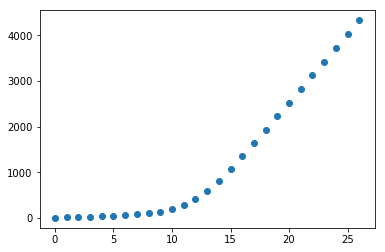

In [3]:
ks = np.arange(27)
ppa0 = 155.3
ppa1 = 146.
ppkth = 12.
ppacr = 3 #9.
depths = ppa0*ks + NEMO_tanh_integral(ks, ppa1, ppkth, ppacr)
ppsur = depths[0]
depths = depths - ppsur
print (depths[-1])
plt.plot(ks, depths, 'o')

In [4]:
ppsur

1448.5484429060723

#### We will use these as our input NEMO parameters for now and get the NEMO levels from the mesh mask generated after one time step  

#### Use the negative of the value of ppsur obtained as the output of the last cell in the NEMO namelist

4329.69182132


(0, 500)

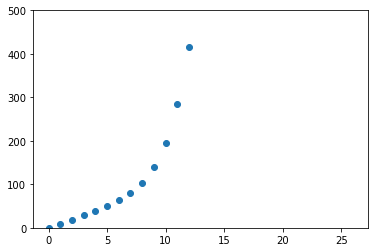

In [5]:
ks = np.arange(27)
ppa0 = 155.3
ppa1 = 146.
ppkth = 12.
ppacr = 3.
depths = ppa0*ks + NEMO_tanh_integral(ks, ppa1, ppkth, ppacr)
ppsur = depths[0]
depths = depths - ppsur
print (depths[-1])
plt.plot(ks, depths, 'o')
plt.ylim((0,500))

#### Decided NEMO depths are these below and they can be found in the mesh_mask.nc in /ocean/ssahu/CANYONS/Runs/trial_run_mesh_mask_gen/

In [58]:
nav_lev = [14.75076, 24.42878, 34.46413, 45.19286, 57.26234, 71.90678, 
    91.43279, 119.99, 164.529, 235.2601, 344.0054, 499.3054, 701.1602, 
    941.0291, 1207.09, 1489.133, 1780.207, 2076.162, 2374.693, 2674.564, 
    2975.129, 3276.051, 3577.156, 3878.357, 4179.605, 4480.879, 4782.166];

In [59]:
print(nav_lev)

[14.75076, 24.42878, 34.46413, 45.19286, 57.26234, 71.90678, 91.43279, 119.99, 164.529, 235.2601, 344.0054, 499.3054, 701.1602, 941.0291, 1207.09, 1489.133, 1780.207, 2076.162, 2374.693, 2674.564, 2975.129, 3276.051, 3577.156, 3878.357, 4179.605, 4480.879, 4782.166]


In [6]:
depths

array([    0.        ,     9.43918424,    19.01015122,    28.8374421 ,
          39.16264578,    50.45260745,    63.60276044,    80.30605025,
         103.67608192,   139.14756085,   195.32867799,   283.64719005,
         415.05155709,   594.24719005,   816.52867799,  1070.94756085,
        1346.07608192,  1633.30605025,  1927.20276044,  2224.65260745,
        2523.96264578,  2824.2374421 ,  3125.01015122,  3426.03918424,
        3727.2       ,  4028.42852324,  4329.69182132])

2071.17623126


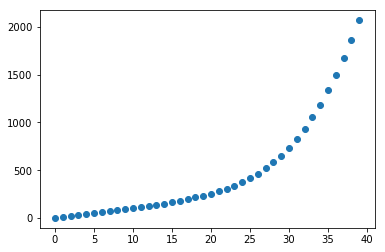

In [7]:
ks = np.arange(40)
ppa0 = 155.3
ppa1 = 146.
ppkth = 35.
ppacr = 10.
depths = ppa0*ks + NEMO_tanh_integral(ks, ppa1, ppkth, ppacr)
ppsur = depths[0]
depths = depths - ppsur
print (depths[-1])
plt.plot(ks, depths, 'o')
# plt.ylim((0,500))

In [8]:
ppsur

4099.3358574049898

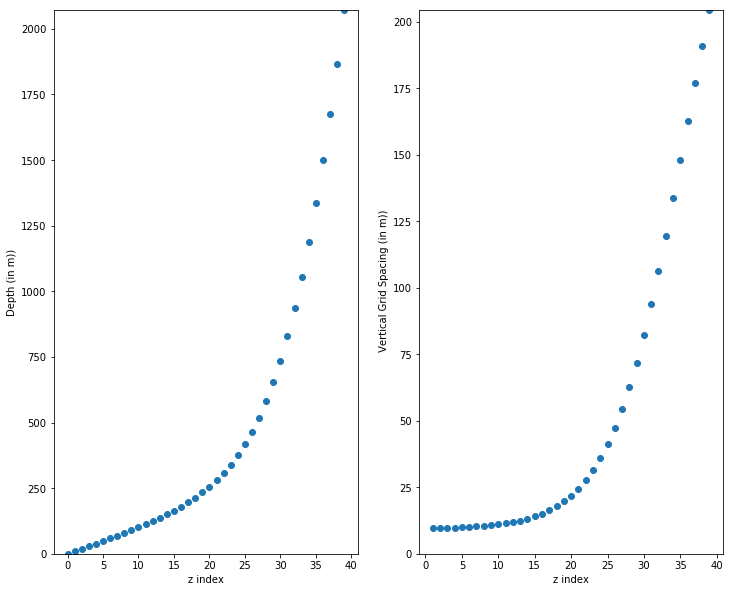

In [4]:
depths_diff = np.ediff1d(depths)

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(12,10))

ax1.set_ylim(np.min(depths),np.max(depths))
ax2.set_ylim(0,np.max(depths_diff))

q1 = ax1.plot(ks,depths,'o')
ax1.set_ylabel("Depth (in m))")
ax1.set_xlabel('z index')


q2 = ax2.plot(ks[1:],depths_diff,'o')
ax2.set_ylabel(" Vertical Grid Spacing (in m))")
ax2.set_xlabel('z index')


# plt.plot(ks[1:], depths_diff, 'o')

In [48]:
np.where(depths<=200)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),)

In [49]:
depths[17]

196.12661476947414

In [53]:
depths_diff[16]

16.355999767860339

In [55]:
np.max(depths_diff)

204.37456457436292

In [7]:
depths

array([    0.        ,     9.5944658 ,    19.2540466 ,    28.99311946,
          38.8292252 ,    48.78375928,    58.88281114,    69.15818238,
          79.6486202 ,    90.40130869,   101.47366777,   112.93551729,
         124.87167098,   137.3850325 ,   150.6002708 ,   164.66815374,
         179.770615  ,   196.12661477,   213.9988258 ,   233.70112539,
         255.60679228,   280.15718536,   307.87050925,   339.35004112,
         375.29090584,   416.4841551 ,   463.81657035,   518.26434067,
         580.87867746,   652.76166129,   735.03132275,   828.77623126,
         935.00166669,  1054.57152748,  1188.15200827,  1336.1641426 ,
        1498.75200827,  1675.77152748,  1866.80166669,  2071.17623126])